In [2]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('music.csv')

In [14]:
df.head()

# gender male = 1 female = 2

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


In [5]:
df.shape

(16598, 11)

In [19]:
df.genre.value_counts()

Classical    6
Acoustic     3
Jazz         3
Dance        3
HipHop       3
Name: genre, dtype: int64

In [15]:
df.describe()


,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


In [16]:
df.values

array([[20, 1, 'HipHop'],
       [23, 1, 'HipHop'],
       [25, 1, 'HipHop'],
       [26, 1, 'Jazz'],
       [29, 1, 'Jazz'],
       [30, 1, 'Jazz'],
       [31, 1, 'Classical'],
       [33, 1, 'Classical'],
       [37, 1, 'Classical'],
       [20, 0, 'Dance'],
       [21, 0, 'Dance'],
       [25, 0, 'Dance'],
       [26, 0, 'Acoustic'],
       [27, 0, 'Acoustic'],
       [30, 0, 'Acoustic'],
       [31, 0, 'Classical'],
       [34, 0, 'Classical'],
       [35, 0, 'Classical']], dtype=object)

In [55]:
# Train and test


X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2) 


model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
score

1.0

In [25]:
# predict music genre for a 21 years old male and 22 years old female

predictions1= model.predict([[21,1], [22,0]])

predictions

array(['HipHop', 'Dance'], dtype=object)

# Model persistance

In [64]:
import joblib
from joblib import dump, load

joblib.dump(model, 'music-recommender.joblib')

dump(model, '/Users/nelly/Machine_learning/music-recommender.joblib')


['/Users/nelly/Machine_learning/music-recommender.joblib']

In [71]:
# to use it 

model = joblib.load('/Users/nelly/Machine_learning/music-recommender.joblib')

# predict music genre for a 27 years old male 

predictions1= model.predict([[27,1]])

predictions1

array(['Jazz'], dtype=object)

# Visualisation

In [3]:
from sklearn import tree

music_data = pd.read_csv('music.csv')

X = df.drop(columns=['genre'])
y = df['genre']

model = DecisionTreeClassifier()
model.fit(X,y)

tree.export_graphviz(model,out_file='music-recommender.dot',
                    feature_names= ['age', 'gender'], # so we can see the rules used by the nodes
                    class_names= sorted(y.unique()), # the unique type of genres
                    label='all', # so every node has labels that we can read
                    rounded= True, # boxes with rounded corners
                    filled= True) # for the color of the boxes
    

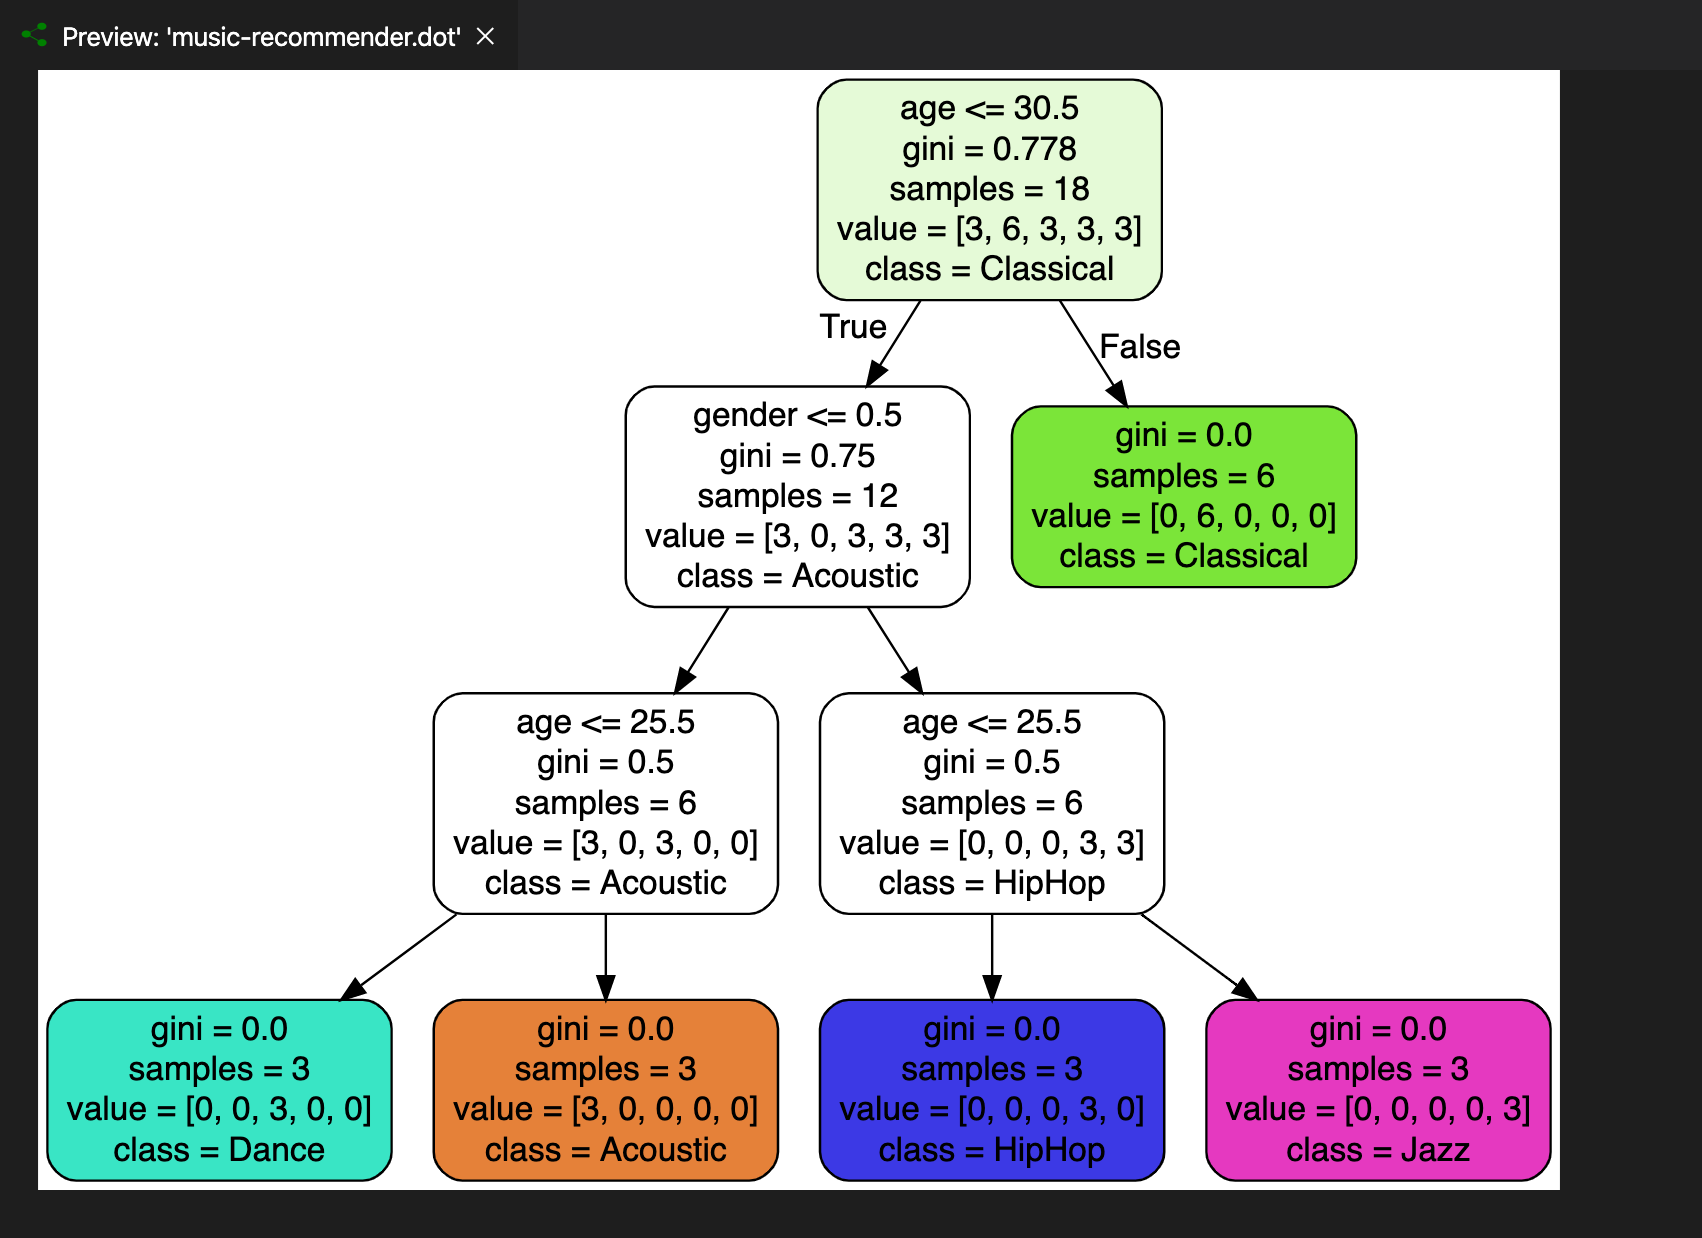

In [4]:
from IPython.display import Image
Image("music_tree.png")

In [ ]:
# Reference : Programming with Mosh 